# 热图绘制

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline


# 非自写
np.random.rand(0)
sns.set()

[[0.2293901  0.05975897 0.03453792]
 [0.7106885  0.05105404 0.6326405 ]
 [0.27912744 0.42719856 0.20732573]]


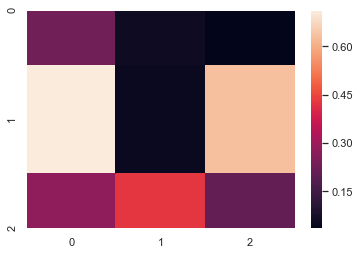

In [10]:
# 构造数据，随机生成3*3 的矩阵
data = np.random.rand(3,3)
print(data)

# 采用heatmap() 函数画出热度图，将数据传入函数中
sns.heatmap(data)

# 定义股票的涨势情况

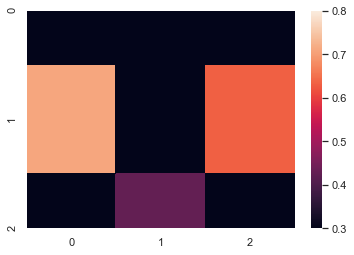

In [14]:
# 对color_bar 进行设置，传入的数据依然不变
sns.heatmap(data,vmin = .3,vmax = .8)

[[-0.13427214 -0.98326665  1.89362679]
 [-1.16839937 -0.90512831  0.01257897]
 [-1.53406069 -0.36243515  0.1015319 ]]


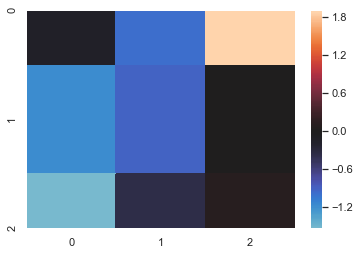

In [18]:
# 数据中有负值又有正值。（权重）
# 通过np.random.randn() 函数可以创建出来正负值都有的矩阵
# 通过np.random.rand() 函数只可以创建出来含有正值的矩阵
normal_data = np.random.randn(3,3)
print(normal_data)
# 确定中心值为0
sns.heatmap(normal_data,center = 0)

In [29]:
# 读取数据，： seabron 内部含有数据集航班数据
# import seaborn as sns
# flights = sns.load_dataset("flights")
# flights.head()

In [27]:
# flights = flights.pivot("month","year",'passengers')
# print(flights)
# sns.heatmap(flights)

In [30]:
# 属性：,annot = True，显示出来数据的大小，fmt属性显示出来字体格式，默认字体的格式会乱码
# sns.heatmap(flights,annot = True,fmt = "d")

In [31]:
# 指定网格之间的间距: linewidth
# sns.heatmap(flights,linewidth = .5)

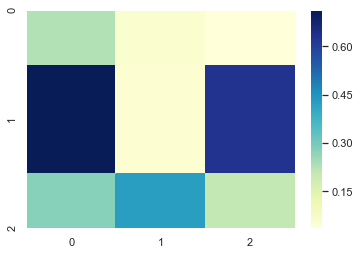

In [32]:
# 自己指定color——bar
sns.heatmap(data,cmap = "YlGnBu")

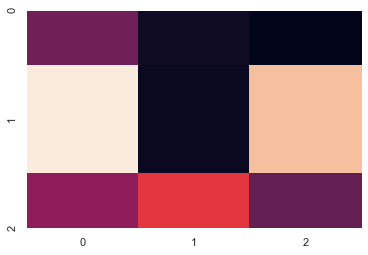

In [33]:
# 将color_bar 进行隐藏: 指定：cbar = False
sns.heatmap(data,cbar = False)

# K近邻算法

In [41]:
dc_listings = pd.read_csv('./data/risk.csv')
dc_listings.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [44]:
import pandas as pd

# 使用pandas进行数据的读取

# 指定features,选中一些特征进行分析，只保留一些列
features = ['Smokes','Age','Dx:Cancer','Smokes (years)']
dc_listings = pd.read_csv('./data/risk.csv')
dc_listings = dc_listings[features]
print(dc_listings.shape)

dc_listings.rename(columns={'Smokes (years)':'Smokeyear'}, inplace = True) 

dc_listings.head()

# (858, 4)： 说明拿到了这么哦多数据，有4 个特征

(858, 4)


,Smokes,Age,Dx:Cancer,Smokeyear
0,0.0,18,0,0.0
1,0.0,15,0,0.0
2,0.0,34,0,0.0
3,1.0,52,1,37.0
4,0.0,46,0,0.0


#  如果我年龄30,烟龄12，预测我是否有Cancer

笔记：
- 第一点：距离的定义 欧氏距离

In [33]:
# import numpy as np
 
# our_acc_value = 12

#    问题 不能转换成int
# #dc_listings['distance'] = np.abs(dc_listings.Smokeyear.map(int) - our_acc_value)
# dc_listings.distance.value_counts().sort_index()

In [34]:
print(dc_listings.Smokeyear)

0              0.0
1              0.0
2              0.0
3             37.0
4              0.0
5              0.0
6             34.0
7              0.0
8              0.0
9      1.266972909
10             0.0
11             0.0
12             0.0
13             0.0
14             0.0
15             0.0
16             0.0
17             0.0
18             0.0
19             0.0
20             0.0
21             0.0
22             0.0
23             0.0
24             0.0
25             0.0
26             0.0
27             0.0
28             3.0
29             0.0
          ...     
828            0.0
829            0.0
830            0.0
831            0.0
832            0.0
833            0.0
834           16.0
835            0.0
836            0.0
837           11.0
838            0.0
839            0.0
840            0.0
841            0.0
842            6.0
843            0.0
844            9.0
845            0.0
846            0.0
847            0.0
848            0.0
849         

In [40]:
# dc_listings['Smokeyear'] = dc_listings.Smokeyear.astype(int)